In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("success")

success


# Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load train and validation data from Facebook HMD dataset

In [ ]:
folder_path_train ="/content/drive/MyDrive/HMD_project/train.jsonl"
folder_path_dev ="/content/drive/MyDrive/HMD_project/dev.jsonl"
df_train = pd.read_json(folder_path_train,lines=True)
df_dev=pd.read_json(folder_path_dev,lines=True)

print(df_dev.tail())

        id            img  label  \
495  83675  img/83675.png      0   
496  37198  img/37198.png      0   
497  48670  img/48670.png      0   
498   9863  img/09863.png      0   
499  97320  img/97320.png      0   

                                                  text  
495                   i'm gonna be like phelps one day  
496  when you're so relaxed you can feel yourself g...  
497  look at this sandwich maker club i found on wi...  
498                             diverse group of women  
499  "when your dishwasher is broken so you take it...  


# check distribution of data in train and validation dataset

Distribution of training dataset
 0    5450
1    3050
Name: label, dtype: int64 

Distribution of validation dataset
 1    250
0    250
Name: label, dtype: int64


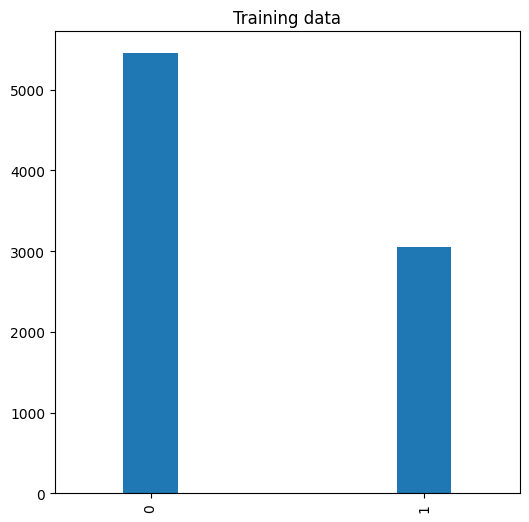

In [ ]:
# distribution of movies based on certificate
df_train['label'].value_counts().plot(kind='bar', figsize=(6, 6),width=0.2,title='Training data')

print('Distribution of training dataset\n',df_train.label.value_counts(),"\n")
print("Distribution of validation dataset\n",df_dev.label.value_counts())

# Check null values

In [ ]:
print(df_train.isna().sum())

print("\n\n",df_dev.isna().sum())

id       0
img      0
label    0
text     0
dtype: int64


 id       0
img      0
label    0
text     0
dtype: int64


# form the text file load the text corresponding to the augmented images

In [ ]:
with open('/content/drive/MyDrive/HMD_project/new/text_aug_norm.txt','r') as f:
  lines=f.readlines()
  file_names=[]
  for i in lines:
    file_names.append(i[:i.find('\n')])
  print(type(file_names[0]))

<class 'str'>


# add augmented text in the training dataframe

In [ ]:
for i in range(len(file_names)):
  df_train.loc[len(df_train.index)] = [1, 'img/1',1,file_names[i]]


# load pretrained word embedding model from gensim library

In [ ]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# import gensim.downloader as api
# wv=api.load('glove-twitter-200')


In [ ]:
# wv.save('/content/drive/MyDrive/HMD_project/glove-twitter-200')

In [ ]:
from gensim.models import KeyedVectors
wv=KeyedVectors.load('/content/drive/MyDrive/HMD_project/glove-twitter-200')



# word to vector conversion using gensim 'glove-twitter-200' model

In [ ]:
w=wv["hate"]
print(w)
print("\n\nlength of word vector",len(w))

print("\n\n type of word vector model ",type(wv))
print("\n\n word vector type",type(w))

[ 8.7812e-02  1.5509e-01  1.9043e-02  3.2794e-01 -6.2865e-01  3.8354e-01
  1.0874e+00 -2.2673e-01 -2.0495e-02  1.9731e-01 -9.7951e-03 -4.5427e-01
 -1.0219e+00 -1.3749e-01 -4.4656e-01 -4.9074e-01 -2.7059e-01 -1.4863e-01
 -4.6549e-01  7.8394e-02  6.3029e-01 -1.6537e-01  3.9175e-01 -4.5700e-02
  4.6430e-02  1.0258e+00 -2.0306e-01  2.7607e-01 -4.0719e-01 -2.6598e-01
 -2.8612e-01 -5.6371e-01 -4.2307e-01  5.3469e-01 -6.2339e-01 -2.1108e-01
 -2.1612e-01  1.7285e-01  8.1810e-01  2.3707e-01  5.0373e-01  3.8908e-01
  4.8352e-03 -4.0132e-01 -2.5998e-01  4.2505e-01  2.0397e-02  2.3174e-01
  8.0093e-02 -4.7759e-01  3.9593e-01  4.1413e-01 -2.2591e-02 -3.1482e-01
  2.6453e-01 -1.3888e-01 -1.0361e+00 -3.8331e-01 -1.9307e-01 -9.3058e-02
  1.2725e-01 -2.6898e-01 -2.5831e-02 -1.6715e-01  1.1055e-01 -4.6246e-04
 -4.7856e-02  2.9984e-01 -4.7439e-01  4.9714e-02 -4.7032e-01  1.7674e-01
 -4.5200e-01 -1.5224e-01 -3.2700e-01 -1.7972e-02  1.5228e-01  9.4610e-02
  3.1846e-01  9.5296e-02 -2.1787e-01  3.0930e-02 -3

# Import spacy library for text preprocessing

In [ ]:
import spacy

# use sapcy 'en_core_web_sm" model fpr preporocessing

In [ ]:
import spacy.cli
# spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

# tokenize each word in a sentence and apply lemmatization on it, remove punctuation, space, brackets if any

In [ ]:

def preprocess(text):
  doc=nlp(text)
  filtered_token=[]

  for token in doc:

    if token.is_punct or token.is_space or token.is_bracket or token.is_stop:
      continue
    else:
      token=token.lemma_

      filtered_token.append(token)
  return filtered_token




# example showing text preprocessing

In [ ]:
tokens=preprocess("My best friend Anu, (who is three months older than me) is coming to my house tonight!!!.")
tokens

['good', 'friend', 'Anu', 'month', 'old', 'come', 'house', 'tonight']

# Apply preprocessing on the text column of training dataset and validation dataset

In [ ]:

df_dev['processed_text_val']=df_dev['text'].apply(lambda x: preprocess(x))

data['processed_text']=data['text'].apply(lambda x: preprocess(x))

data.head()


,id,img,label,text,processed_text
0,42953,img/42953.png,0,its their character not their color that matters,"[character, color, matter]"
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,"[afraid, love, like, ex]"
2,13894,img/13894.png,0,putting bows on your pet,"[put, bow, pet]"
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,"[love, everybody, squirrel, hate, squirrel]"
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...","[everybody, love, chocolate, chip, cookie, hit..."


# use gensim pretrained model to vectorize each token in the preprocessed text and take the average of vectors to keep the dimension same

In [ ]:
import numpy as np

def gensim_vector(token):
  vec_size=wv.vector_size
  wv_final=np.zeros(vec_size) # take a vector consisting '0s' having size of wv

  count=1
  for t in token:
    if t in wv:
      count += 1
      wv_final += wv[t] # vectorize word and add to previous value

  return wv_final/count # take the average


# Apply the vectorization process on processed text column of the validation and training dataset

In [ ]:

data["text_vector"]=data["processed_text"].apply(gensim_vector)
df_dev["text_vector_val"]=df_dev["processed_text_val"].apply(gensim_vector)
print(data.head(),'\n\n')
print(df_dev.head())

In [ ]:
len(data.text_vector.iloc[0])

200

# Save text vector in a numpy file





In [ ]:
text_vector=data['text_vector']
text_vector=np.stack(text_vector)
print(text_vector.shape)
print(text_vector[0].shape)
np.save('/content/drive/MyDrive/HMD_project/new/twitter_embedding_train_text.npy',text_vector)



text_vector_val=df_dev['text_vector_val']
text_vector_val=np.stack(text_vector_val)
print(text_vector_val.shape)
print(text_vector_val[0].shape)
np.save('/content/drive/MyDrive/HMD_project/new/twitter_embedding_val_text.npy',text_vector_val)





(10900, 200)
(200,)
(500, 200)
(200,)


# Use Latent Semantic analysis for text embedding

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# TFIDF vectorizer
# topic encoded text vector using SVD (LSA) on TFIDF vectorizer

In [ ]:
vectorizer=TfidfVectorizer(stop_words="english")
svd=TruncatedSVD(n_components=1000)

# for training dataset
processed_text = data["processed_text"].apply(lambda x: " ".join(x))

text_vec_tfidf=vectorizer.fit_transform(processed_text)
print("CountVectorizer shape_training dataset",text_vec_tfidf.shape)

# for valiadation dataset
processed_text_val=df_dev["processed_text_val"].apply(lambda x: " ".join(x))

text_vec_tfidf_val=vectorizer.transform(processed_text_val)
print("CountVectorizer shape_val dataset",text_vec_tfidf_val.shape)


# training dataset
lsa_text=svd.fit_transform(text_vec_tfidf)

print('\nvariance_captured_by 1000 components',svd.explained_variance_ratio_.sum())
# validation dataset
lsa_text_val=svd.transform(text_vec_tfidf_val)


print('\n',lsa_text.shape)
print(lsa_text_val.shape)




CountVectorizer shape_training dataset (10900, 7020)
CountVectorizer shape_val dataset (500, 7020)

variance_captured_by 1000 components 0.7169647318534256

 (10900, 1000)
(500, 1000)


# save embedded tfidf-lsa vector as npy file

In [ ]:

np.save('/content/drive/MyDrive/HMD_project/new/lsa_tfidf_train_text.npy',lsa_text)
np.save('/content/drive/MyDrive/HMD_project/new/lsa_tfidf_val_text.npy',lsa_text_val)

# topic encoded text vector using SVD (LSA) on BOW vectorizer

In [ ]:

vectorizer=CountVectorizer(stop_words="english")
svd2=TruncatedSVD(n_components=1000)


# for training dataset
processed_text = data["processed_text"].apply(lambda x: " ".join(x))

text_vec_bow = vectorizer.fit_transform(processed_text)
print("CountVectorizer shape_training dataset",text_vec_bow.shape)

# for validation dataset
processed_text_val=df_dev["processed_text_val"].apply(lambda x: " ".join(x))

text_vec_bow_val = vectorizer.transform(processed_text_val)
print("CountVectorizer shape_val dataset",text_vec_bow_val.shape)


lsa_bow_text=svd2.fit_transform(text_vec_bow)

## variance captured by 1000 components
print('\nvariance_captured_by 1000 components',svd2.explained_variance_ratio_.sum())
lsa_bow_text_val=svd2.transform(text_vec_bow_val)

print('\n',lsa_bow_text.shape)
print(lsa_bow_text_val.shape)

np.save('/content/drive/MyDrive/HMD_project/new/lsa_bow_train_text.npy',lsa_bow_text)
np.save('/content/drive/MyDrive/HMD_project/new/lsa_bow_val_text.npy',lsa_bow_text_val)


CountVectorizer shape_training dataset (10900, 7020)
CountVectorizer shape_val dataset (500, 7020)

variance_captured_by 1000 components 0.8145179671431473

 (10900, 1000)
(500, 1000)


# TFIDF vectorizer
# topic encoded text vector using NMF on TFIDF vectorizer

In [ ]:
from sklearn.decomposition import NMF
vectorizer=TfidfVectorizer()
nmf = NMF(n_components=200)

# for training dataset
processed_text = data["processed_text"].apply(lambda x: " ".join(x))

text_vec_tfidf=vectorizer.fit_transform(processed_text)
print("CountVectorizer shape_training dataset",text_vec_tfidf.shape)

# for valiadation dataset
processed_text_val=df_dev["processed_text_val"].apply(lambda x: " ".join(x))

text_vec_tfidf_val=vectorizer.transform(processed_text_val)
print("CountVectorizer shape_val dataset",text_vec_tfidf_val.shape)


# training dataset
nmf_text=nmf.fit_transform(text_vec_tfidf)

# validation dataset
nmf_text_val=nmf.transform(text_vec_tfidf_val)


print(nmf_text.shape)
print(nmf_text_val.shape)

CountVectorizer shape_training dataset (10900, 7087)
CountVectorizer shape_val dataset (500, 7087)
(10900, 200)
(500, 200)


In [ ]:
np.save('/content/drive/MyDrive/HMD_project/new/nmf2_tfidf_train_text.npy',nmf_text)
np.save('/content/drive/MyDrive/HMD_project/new/nmf2_tfidf_val_text.npy',nmf_text_val)